#importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
dataset = pd.read_csv('winequalityN.csv')

In [3]:
dataset.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [4]:
#Reordering the Columns
dataset = dataset[['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'pH', 'quality' ]]

In [5]:
dataset.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,pH,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,0.45,8.8,3.0,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,0.49,9.5,3.3,6


In [7]:
print(dataset.dtypes)

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
sulphates               float64
alcohol                 float64
pH                      float64
quality                   int64
dtype: object


In [8]:
#converting quality from int to str(object) so as to be able replace the multiple numbers into two categories of 0 and 1
dataset['quality'] = dataset['quality'].astype(str) 

In [9]:
print(dataset.dtypes)

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
sulphates               float64
alcohol                 float64
pH                      float64
quality                  object
dtype: object


In [11]:
#change 3, 4, 5, 6 to 0(low quality) and 7, 8, 9 as 1(high quality)
dataset["quality"] = dataset["quality"].replace(["3"], '0')
dataset["quality"] = dataset["quality"].replace(["4"], '0')
dataset["quality"] = dataset["quality"].replace(["5"], '0')
dataset["quality"] = dataset["quality"].replace(["6"], '0')
dataset["quality"] = dataset["quality"].replace(["7"], '1')
dataset["quality"] = dataset["quality"].replace(["8"], '1')
dataset["quality"] = dataset["quality"].replace(["9"], '1')

In [14]:
dataset.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,pH,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,3.00,0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,3.30,0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,3.26,0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,3.19,0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,3.19,0
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,3.26,0
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,0.47,9.6,3.18,0
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,3.00,0
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,3.30,0
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,0.45,11.0,3.22,0


In [15]:
#convert quality back to int
dataset['quality'] = dataset['quality'].astype(int)

In [16]:
print(dataset.dtypes)

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
sulphates               float64
alcohol                 float64
pH                      float64
quality                   int64
dtype: object


In [17]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [23]:
dataset.columns[0]

'type'

#Encoding categorical independent variable 'type'

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [37]:
print(X)

[[0.0 1.0 7.0 ... 0.45 8.8 3.0]
 [0.0 1.0 6.3 ... 0.49 9.5 3.3]
 [0.0 1.0 8.1 ... 0.44 10.1 3.26]
 ...
 [1.0 0.0 6.3 ... 0.75 11.0 3.42]
 [1.0 0.0 5.9 ... 0.71 10.2 3.57]
 [1.0 0.0 6.0 ... 0.66 11.0 3.39]]


In [36]:
np.shape(X)

(6497, 13)

In [38]:
print(y)

[0 0 0 ... 0 0 0]


In [39]:
dataset.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
sulphates                4
alcohol                  0
pH                       9
quality                  0
dtype: int64

#Taking Care of Missing Data

In [40]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

In [41]:
#checking missing data in numpy
np.isnan(X)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [42]:
#sun of all missing data in numpy
np.sum(np.isnan(X))

0

In [43]:
np.sum(np.isnan(y))

0

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   sulphates             6493 non-null   float64
 10  alcohol               6497 non-null   float64
 11  pH                    6488 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [46]:
dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,pH,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,0.300380,-0.095603,-0.251814,-0.049679
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.225476,-0.038248,0.260660,-0.151502
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,0.057613,-0.010433,-0.328689,0.054178
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.185745,-0.359706,-0.267050,-0.063876
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.395332,-0.256861,0.044806,-0.161910
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.188489,-0.179838,-0.145191,0.014767
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.275381,-0.265740,-0.237687,-0.051226
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.259454,-0.686745,0.011920,-0.275441
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,1.000000,-0.003261,0.191248,0.034159
alcohol,-0.095603,-0.038248,-0.010433,-0.359706,-0.256861,-0.179838,-0.265740,-0.686745,-0.003261,1.000000,0.121002,0.390486


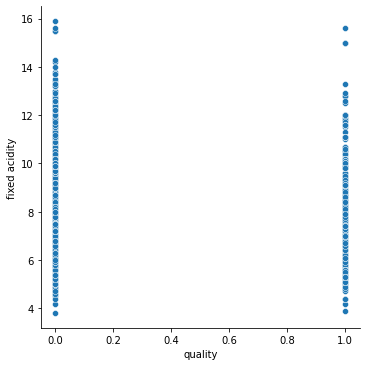

In [48]:
sns.relplot(data=dataset, x="quality", y="fixed acidity")

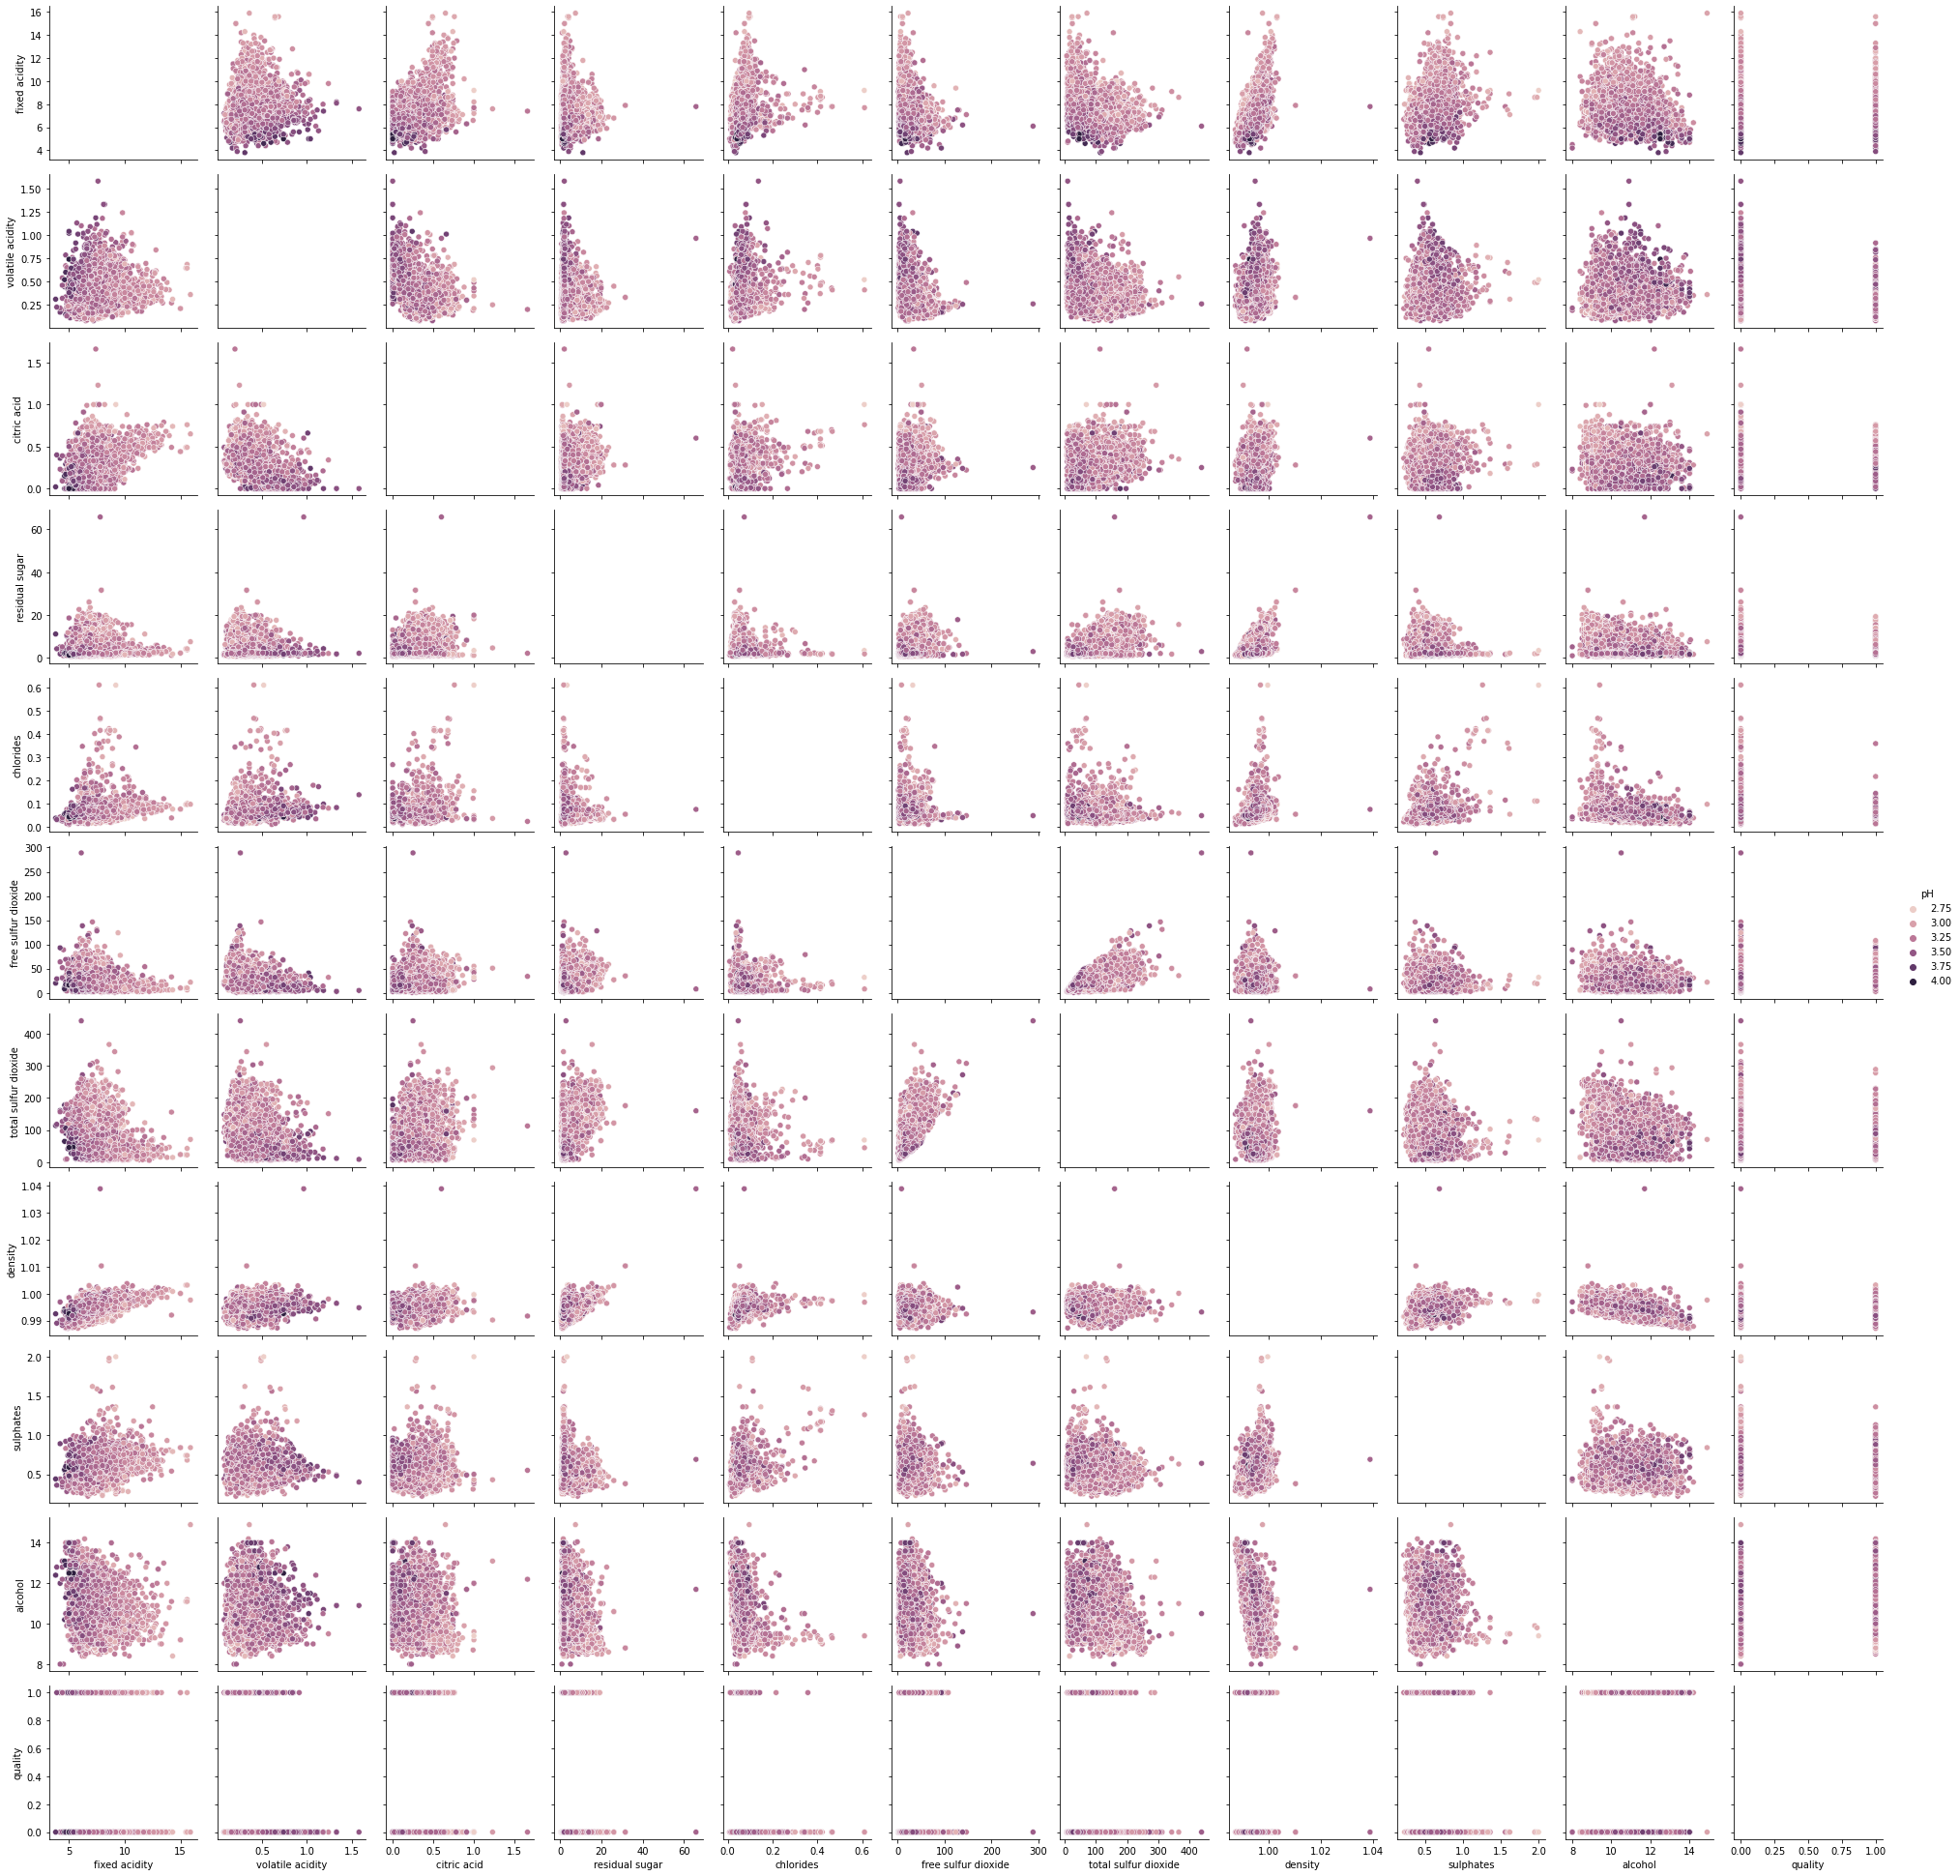

In [49]:
g= sns.PairGrid(dataset, hue="pH");
g.map_offdiag(sns.scatterplot);
g.add_legend()

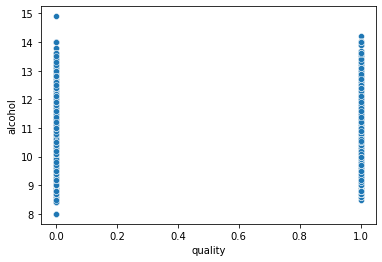

In [50]:
current_palette = sns.color_palette("hls", 8)
sns.scatterplot(data=dataset, x="quality", y="alcohol", palette="current_palette");

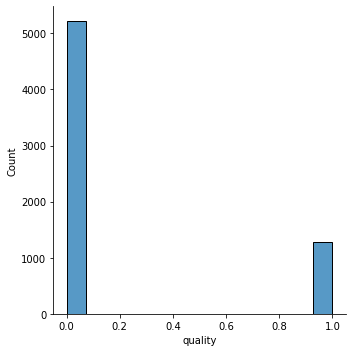

In [52]:
sns.displot(dataset, x="quality")

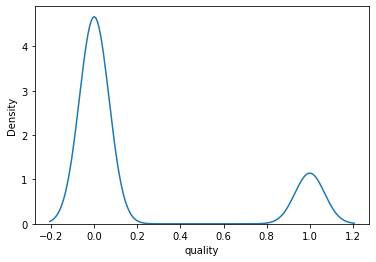

In [51]:
sns.kdeplot(data=dataset, x="quality")

#Splitting dataset into Training and Test Sets

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [54]:
#Checking the splits
np.shape(y_train)

(5197,)

Simle Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting the Test Set Result

In [56]:
y_pred = regressor.predict(X_test)

confusion matrix and accuracy score of y_pred

In [58]:
y_pred = regressor.predict(X_test)
y_pred = np.round(y_pred)
print("Accuracy: %s%%" % (100*accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

Accuracy: 81.23076923076923%
[[1011   17]
 [ 227   45]]


#Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Training The Logistics Regression Model on the Training Set

In [60]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


In [61]:
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred)
print("Accuracy: %s%%" % (100*accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

Accuracy: 81.07692307692308%
[[980  48]
 [198  74]]


#Training the Kernel SVM model on the Training set

In [63]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [64]:
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred)
print("Accuracy: %s%%" % (100*accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

Accuracy: 83.07692307692308%
[[1000   28]
 [ 192   80]]


#Training Decision Tree Classification Model on a Training Set

In [65]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [66]:
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred)
print("Accuracy: %s%%" % (100*accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

Accuracy: 83.61538461538461%
[[923 105]
 [108 164]]


#Training the Random Forest Classification Model on the Training Set

In [71]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 250, criterion = 'entropy', max_features=4, random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [72]:
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred)
print("Accuracy: %s%%" % (100*accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

Accuracy: 89.46153846153845%
[[997  31]
 [106 166]]


#XGBOOST CLASSIFIER Model on the Training Set

In [73]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [77]:
y_pred = classifier.predict(X_test)
print("Accuracy: %s%%" % (100*accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

Accuracy: 84.92307692307692%
[[989  39]
 [157 115]]


Fine Tuning Xboost Model

In [79]:
XGB = XGBClassifier(n_estimators=250,max_features=5)
XGB.fit(X_train, y_train)
predictions = XGB.predict(X_test)
print("Accuracy: %s%%" % (100*accuracy_score(y_test, predictions)))
print(confusion_matrix(y_test, predictions))

Accuracy: 85.23076923076923%
[[984  44]
 [148 124]]


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1028
           1       0.75      0.42      0.54       272

    accuracy                           0.85      1300
   macro avg       0.80      0.69      0.72      1300
weighted avg       0.84      0.85      0.83      1300



#Applying K-Fold Cross Validation

In [81]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.34 %
Standard Deviation: 1.29 %
